## Question 1

In [3]:
import pandas as pd
from sklearn.datasets import load_digits

In [4]:
df = load_digits()

## Question 2

In [5]:
x = df.data
y = df.target

In [6]:
from sklearn.neighbors import KNeighborsClassifier

## Question 3

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [9]:
x_train.shape , x_test.shape

((1257L, 64L), (540L, 64L))

## Question 4

In [10]:
model = KNeighborsClassifier()

In [11]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
pred = model.predict(x_test)

In [13]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':pred})
df1.head()

,Actual,Predicted
0,3,3
1,7,7
2,7,7
3,2,2
4,1,1


## Question 5

In [14]:
model.score(x_test,y_test)*100

98.33333333333333

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        56
          1       0.98      1.00      0.99        63
          2       1.00      1.00      1.00        51
          3       1.00      1.00      1.00        51
          4       1.00      1.00      1.00        49
          5       0.94      0.98      0.96        51
          6       1.00      0.98      0.99        59
          7       1.00      0.98      0.99        63
          8       0.94      0.98      0.96        47
          9       0.96      0.90      0.93        50

avg / total       0.98      0.98      0.98       540



In [16]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,random_state=5)
results1 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
results1.sum()/10

0.9738485412787089

In [17]:
results2 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_log_loss')
results2.sum()/10

-0.20916221370203658

In [18]:
results3 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='r2')
results3.sum()/10

0.9185763399522179

In [19]:
import seaborn as sns

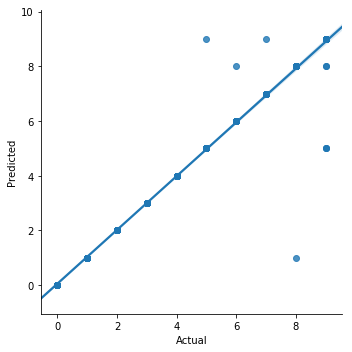

In [20]:
sns.lmplot('Actual',y='Predicted',data = df1)

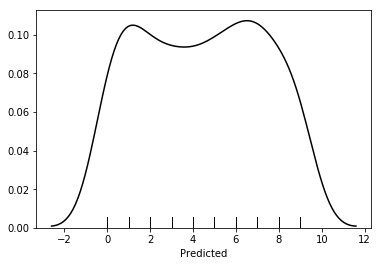

In [21]:
import matplotlib.pyplot as plt
sns.distplot(df1['Predicted'],kde=True, color="black", hist=False, rug=True)